# DVS Python Interface

### EASY DATA LOADING

### Using Poker Dataset with TONIC library

In [ ]:
import aedat

decoder = aedat.Decoder('/Users/gonz495/Downloads/Interns/luigi/dvs/data/POKERDVS/poker_dvs/xspade01.aedat')
print(decoder.id_to_stream())

RuntimeError: the file does not contain AEDAT4 data (wrong magic number)

In [ ]:
# only run for the first time to install libraries
#!pip install tonic --quiet 
#!pip install snntorch --quiet

In [199]:
import tonic

datasets = tonic.datasets.POKERDVS(save_to='./data', train=True)

In [200]:
datapoints, target = datasets[40]
print('Poker card label (int): ', target)
print('coordinate points (events): ', datapoints)
datapoints.dtype
datapoints[:]

Poker card label (int):  0
coordinate points (events):  [(    0, 16, 11, 0) (   10, 10, 17, 0) (   12, 19, 23, 1) ...
 (13478,  9, 24, 1) (13496, 16, 12, 1) (13501, 26, 21, 1)]


array([(    0, 16, 11, 0), (   10, 10, 17, 0), (   12, 19, 23, 1), ...,
       (13478,  9, 24, 1), (13496, 16, 12, 1), (13501, 26, 21, 1)],
      dtype=[('t', '<i8'), ('x', '<i8'), ('y', '<i8'), ('p', '<i8')])

transform:  ToFrame(sensor_size=(31, 32, 2), time_window=None, event_count=None, n_time_bins=2, n_event_bins=None, overlap=0, include_incomplete=False)


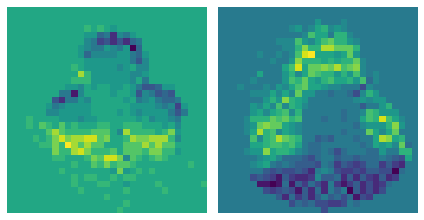

In [201]:
# add flexibility to the number of coordinate points (and make bend more comparable)
tonic.utils.plot_event_grid(datapoints, axis_array = (1, 2))

### make gif file of the collection of this output ###
# see corresponding movement in the dictionary #
# make gray background CONSISTENCY IS KEY
# avoid picture flashing from changes in background color
# make the event changes consistent
# verify the yellow outlier

In [237]:
import tonic.transforms as transforms

sensor_size_p = 2
sensor_size_x = 32
sensor_size_y = 32
sensor_size = (sensor_size_x, sensor_size_y, sensor_size_p)

transformEvents = transforms.ToFrame(
    sensor_size=sensor_size, event_count=len(datapoints)//500, overlap=0.002
)

frames = transformEvents(datapoints)
len(frames)

558

/var/folders/7k/wfdc1r714qgglwzkz4_kmf3rybjsnh/T/ipykernel_76346/312892567.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


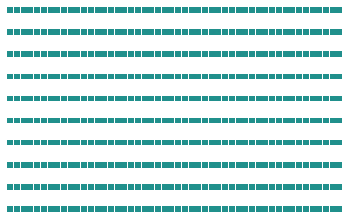

In [240]:
%matplotlib inline

import matplotlib.pyplot as plt

axis_array = 10, 50
num_frames = axis_array[0] * axis_array[1]

fig1, axes_array = plt.subplots(*axis_array)

if 1 in axis_array:
    axes_array = axes_array.reshape(1, -1)

for i in range(axis_array[0]):
    for j in range(axis_array[1]):
        frame = frames[i * axis_array[1] + j]
        axes_array[i, j].imshow(frame[1] - frame[0], vmin = -1, vmax = 1)
        axes_array[i, j].axis("off")

plt.tight_layout()
plt.show()

In [195]:
# poker_results_dir = Path('Users'/'gonz495'/'Downloads'/'Interns'/'luigi'/'dvs'/'results'/'Poker DVS')
frames_dir = Path.cwd() / 'results' / 'Poker DVS' / f'{num_frames} frames'
# run ONLY to change directory when changing number of frames
os.chdir('..')
print(Path.cwd())

/Users/gonz495/Downloads/Interns/luigi/dvs


In [241]:
import os
from pathlib import Path

i = 0
# os.chdir('..' / '..' / '..')
# run os.chdir ONLY to change directory for new number of frames
frames_dir = Path.cwd() / 'results' / 'Poker DVS' / f'{num_frames} frames'

for row_axes in axes_array:
    for axis in row_axes:
        # Save just the portion _inside_ the second axis's boundaries
        # extent = full_extent(axis).transformed(fig1.dpi_scale_trans.inverted())
        # Alternatively,
        extent = axis.get_tightbbox(fig1.canvas.renderer).transformed(fig1.dpi_scale_trans.inverted())
        fig1.savefig(frames_dir / f'ax_{i}_figure.png', bbox_inches=extent)
        i += 1

In [242]:
from PIL import Image
import glob

all_files = f'results/Poker DVS/{num_frames} frames/*.png'
imgs = glob.glob(all_files)
frames = []

for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

frames[0].save(frames_dir / f'{num_frames}frames.gif', format = 'GIF', 
               append_images = frames[1:], save_all = True, 
               duration = 300, loop = 0)

In [142]:
from matplotlib.transforms import Bbox

def full_extent(ax, pad=0.0):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
#    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])

    return bbox.expanded(1.0 + pad, 1.0 + pad)

In [128]:

def event_activation(datapoint):
    if datapoint['p'] == 1:
        x_data.append(datapoint['x'])
        y_data.append(datapoint['y'])
        point.set_xdata(x_data)
        point.set_ydata(y_data)
    else:
        x_data.append(datapoint['x'])
        y_data.append(datapoint['y'])
        point.set_xdata(x_data)
        point.set_ydata(y_data)
    return point,

In [129]:
%matplotlib widget
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd

fig1, axes = plt.subplots(1,2)
fig, ax = plt.subplots()
point, = ax.plot(0, 0)
x_data = [] ; y_data = []
df = pd.DataFrame(datapoints, columns = ['t','x','y','p'])
time_points = sns.scatterplot(ax=axes[0], x="x", y="y", data=df, hue="t")
polarity_points = sns.scatterplot(ax=axes[1], x="x", y="y", data=df, hue="p", palette = 'Greys')
animation = FuncAnimation(fig, func = event_activation, frames = range(df['t'].min(), df['t'].min(), 1), interval = 10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def poker_polarity_separator(data):
    data_points = data
    points_0_polarity = []
    points_1_polarity = []
    for coordinate_point in data_points:
        polarity = coordinate_point[3]
        if polarity == 1:
            points_0_polarity.append(coordinate_point)
        else:
            points_1_polarity.append(coordinate_point)
    return points_0_polarity, points_1_polarity
polarity_datasets = poker_polarity_separator(datapoints)

In [ ]:
class coordinate_point:
    def __init__(self, timestep, x_point, y_point, polarity):
        self.timestep = timestep
        self.x_point = x_point
        self.y_point = y_point
        self.polarity = polarity
    def __repr__(self):
        return repr((self.timestep, self.x_point, self.y_point, self.polarity))

In [5]:
datapoints_list = []
for i, ref_point in enumerate(datapoints):
    datapoints_list.append(coordinate_point(ref_point[0],ref_point[1],ref_point[2],ref_point[3]))
data_sorted_timestamps = sorted(datapoints_list, key=lambda point: point.timestep)

NameError: name 'coordinate_point' is not defined

In [ ]:
from operator import itemgetter

print('x max: ', max(datapoints,key=itemgetter(1))[1])
print('y max: ', max(datapoints,key=itemgetter(2))[2])
print('x max coordinate: ', max(datapoints,key=itemgetter(1)))
print('y max coordinate: ', max(datapoints,key=itemgetter(2)))
print('t max coordinate: ', max(datapoints,key=itemgetter(0)))
print('t min coordinate: ', min(datapoints,key=itemgetter(0)))

x max:  30
y max:  31
x max coordinate:  (352, 30, 3, 1)
y max coordinate:  (14211, 16, 31, 0)
t max coordinate:  (24797, 10, 20, 1)
t min coordinate:  (0, 5, 3, 1)


In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
for sorted_data_point in data_sorted_timestamps:
    fig.patch.set_facecolor('tab:gray')
    fig.patch.set_alpha(0.8)
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('tab:gray')
    ax.patch.set_alpha(0.1)
    # Change AXES' ALPHA FROM 0% TO 10% TO 50% TO 80% TO MODULATE THE MOTION FADE
    plt.xlim(0,35)
    plt.ylim(0,35)
    if sorted_data_point.polarity == 1:
        ax.set_facecolor('tab:gray')
        plt.scatter(sorted_data_point.x_point, sorted_data_point.y_point, color = 'white')
        plt.pause(10**-18)
    else:
        ax.set_facecolor('tab:gray')
        plt.scatter(sorted_data_point.x_point, sorted_data_point.y_point, color = 'black')
        plt.pause(10**-18)
    plt.show()

NameError: name 'data_sorted_timestamps' is not defined

<Figure size 432x288 with 0 Axes>

NameError: name 'data_sorted_timestamps' is not defined

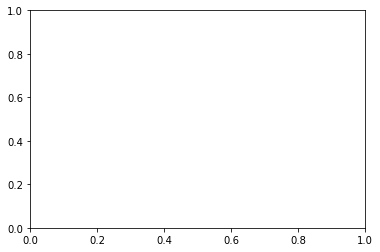

In [153]:
fig, ax = plt.subplots()

for sorted_data_point in data_sorted_timestamps:
    if sorted_data_point.polarity == 1:
        ax.set_facecolor('tab:gray')
        plt.scatter(sorted_data_point.x_point, sorted_data_point.y_point, color = 'white')
        plt.pause(10**-18)
    else:
        ax.set_facecolor('tab:gray')
        plt.scatter(sorted_data_point.x_point, sorted_data_point.y_point, color = 'black')
        plt.pause(10**-18)
    plt.show()

In [ ]:
print(itemgetter(polarity_datasets[0]))
print(polarity_datasets[1])

In [ ]:
print(len(datapoints))
print(len(polarity_datasets[0]))
print(len(polarity_datasets[1]))
sorted_0_polarity = sorted(polarity_datasets[0], key=itemgetter(0))
sorted_1_polarity = sorted(polarity_datasets[1], key=itemgetter(0))
for sorted_0coordinate_point in sorted_0_polarity:
    print(sorted_0coordinate_point[0])

# for _ in range(len(data)):
#     plt.xlim(0, 35)
#     plt.ylim(0, 35)
#     fig, ax = plt.subplots(1,1)
#     ax.set_facecolor('tab:gray')

# plt.show()

4819
3291
1528
0
89
97
102
352
1053
1215
1349
1390
1427
1481
1482
1533
1582
1638
1669
1686
1691
1713
1715
1722
1782
1828
1837
1838
1933
1933
1963
2084
2111
2169
2273
2286
2328
2362
2371
2403
2404
2430
2471
2485
2488
2498
2514
2515
2532
2550
2553
2592
2609
2612
2632
2632
2667
2684
2749
2757
2817
2818
2852
2852
2879
2889
2982
2986
3147
3170
3203
3280
3289
3311
3332
3407
3411
3414
3418
3456
3456
3474
3477
3491
3590
3627
3643
3659
3659
3701
3721
3772
3805
3813
3923
3948
3992
4017
4029
4071
4107
4157
4159
4162
4164
4181
4221
4231
4282
4292
4310
4340
4379
4413
4431
4442
4494
4494
4494
4587
4609
4637
4652
4659
4693
4762
4821
4948
4956
4956
4970
5064
5103
5109
5109
5155
5168
5188
5209
5245
5262
5323
5370
5371
5371
5380
5405
5421
5423
5457
5556
5562
5741
5840
5867
5871
5896
5931
6037
6111
6133
6168
6303
6304
6374
6443
6444
6444
6553
6662
6760
6864
6912
6956
7314
7768
8307
8867
9059
9113
9188
9299
9303
9345
9399
9415
9427
9432
9707
9732
9753
9778
9799
9821
9843
9919
9986
10001
10027
10065
10079


target index:  3


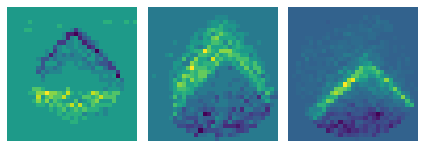

target index:  3


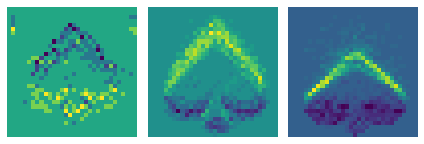

target index:  3


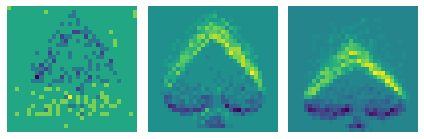

target index:  3


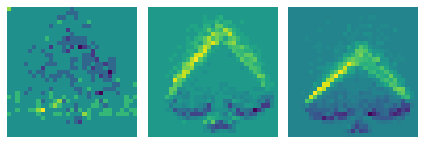

target index:  3


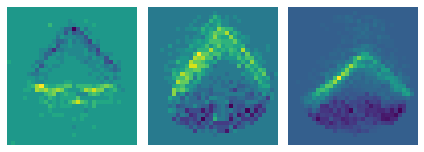

target index:  3


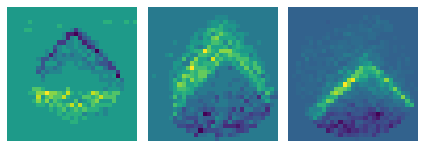

target index:  3


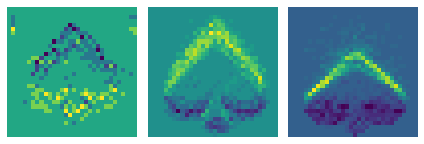

target index:  3


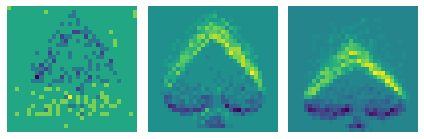

target index:  3


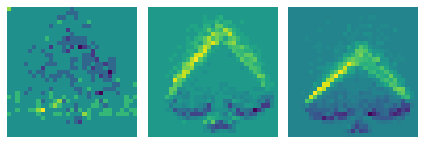

target index:  3


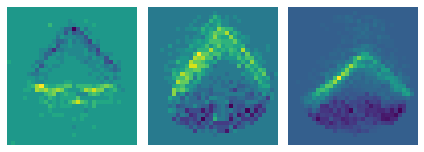

target index:  3


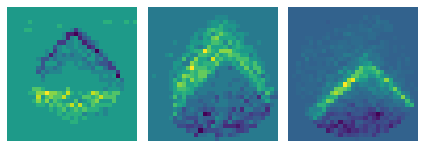

target index:  3


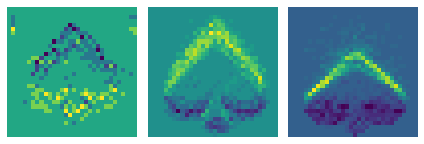

target index:  3


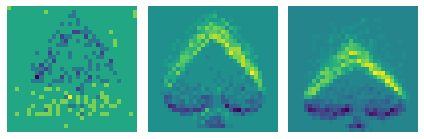

target index:  3


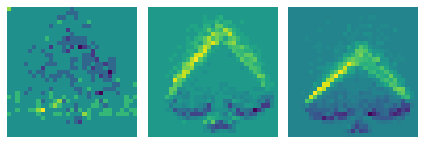

target index:  3


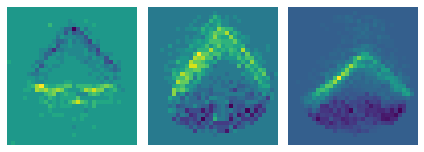

target index:  3


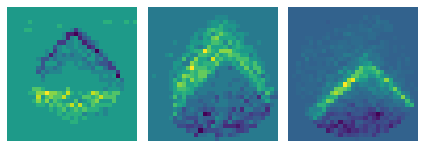

target index:  3


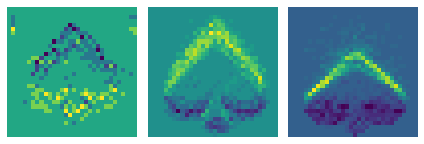

target index:  3


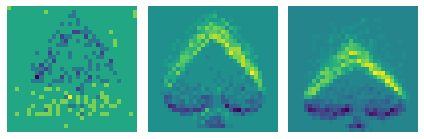

target index:  3


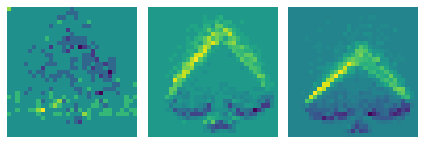

target index:  3


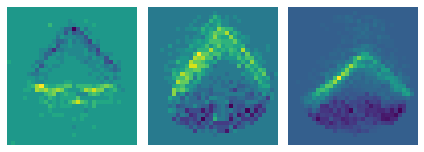

target index:  3


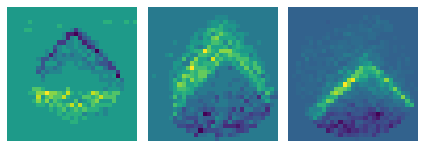

target index:  3


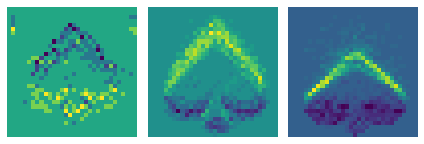

target index:  3


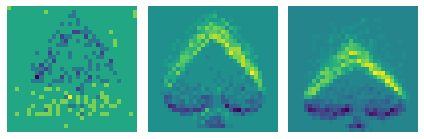

target index:  3


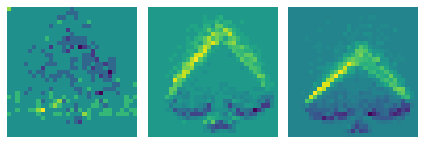

target index:  3


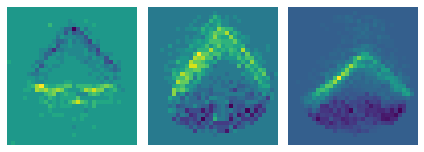

target index:  3


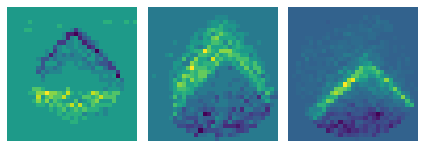

target index:  3


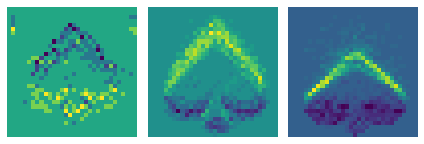

target index:  3


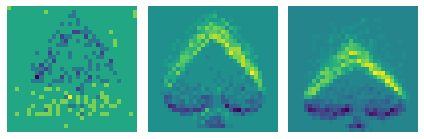

target index:  3


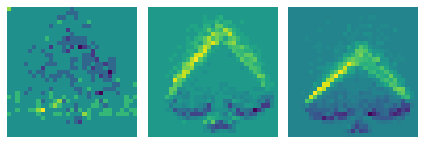

target index:  3


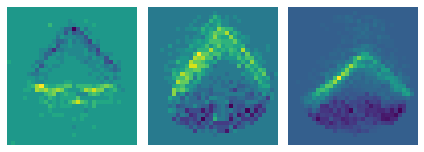

target index:  3


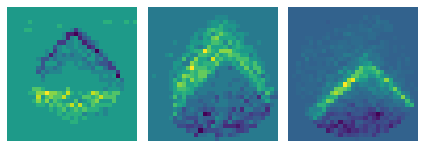

target index:  3


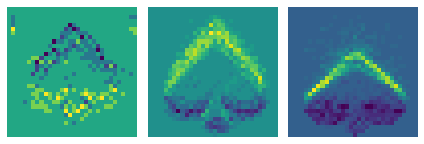

target index:  3


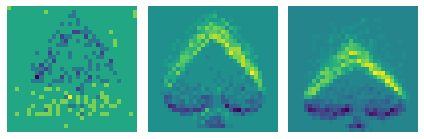

target index:  3


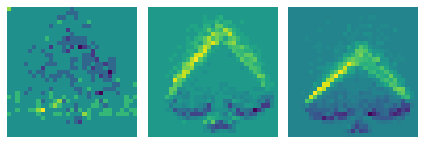

target index:  3


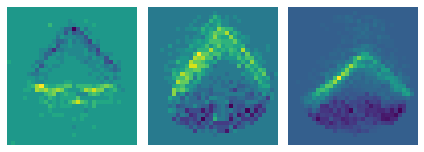

target index:  3


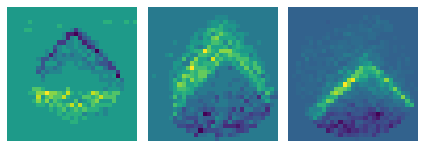

target index:  3


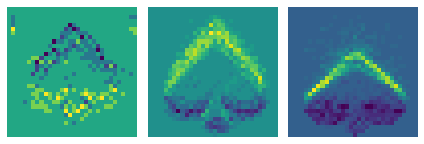

target index:  3


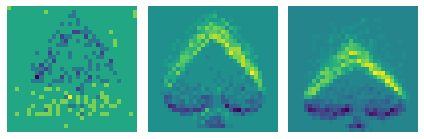

target index:  3


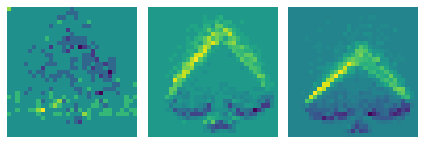

target index:  3


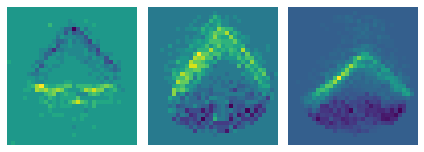

2.64 s ± 745 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 2.64 s ± 745 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [ ]:
# plot first 10 samples of Poker DVS
def load_sample_simple():
    for i in range(5):
        events, target = datasets[i]
        print('target index: ', target)
        tonic.utils.plot_event_grid(events)

%timeit -o load_sample_simple()

### Using Dataloaders with multithreading support

In [ ]:
from torch.utils.data import DataLoader

dataloader = DataLoader(datasets, num_workers=4)

def load_sample_pytorch():
    for i, (events, target) in enumerate(iter(dataloader)):
        if i > 10: break
        
%timeit load_sample_pytorch()

KeyboardInterrupt: 

In [ ]:
from tonic import CachedDataset

cached_dataset = CachedDataset(datasets, cache_path='./cache/fast_dataloading')
cached_dataloader = DataLoader(cached_dataset, num_workers=4)

def load_sample_cached():
    for i, (event, target) in enumerate(iter(cached_dataloader)):
        print('Poker card label (int): ', target)
        print('coordinate data points: ', event)
        if i > 10: break

%timeit -o load_sample_cached()

### Using HATS on N-MNIST with TONIC library as well

In [ ]:
import math
from tqdm import tqdm
import numpy as np
from numba import jit, njit
import matplotlib.pyplot as plt
from collections import namedtuple
# dataset1 = tonic.datasets.NMNIST(save_to='./data', train=True)

In [ ]:
LRBound = namedtuple('LRBound', ['left', 'right'])
Event = namedtuple('Event', ['x', 'y', 'ts', 'polarity'])
TrainingSample = namedtuple('TrainingSample', ['features', 'label'])

event_dtype = np.dtype([('x', np.uint16), ('y', np.uint16), ('ts', np.float64), ('polarity', np.int8)])

In [ ]:
import h5py

filename = '/Users/gonz495/Downloads/Interns/luigi/dvs/HATS/datasets/20samples_N-MNIST.hdf5'
dataset = h5py.File(filename, 'r')

data = dataset['0']['digit_06327']

events = [Event(*ev) for ev in data]
positive_events = [ev for ev in events if ev.polarity == 1]
negative_events = [ev for ev in events if ev.polarity == -1]

In [ ]:
# get the events in recarray format
events_np = np.array(events, dtype=event_dtype)

In [ ]:
%%timeit
events_np = np.array(events, dtype=event_dtype)

7.02 ms ± 220 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### HATS CODE as 'util' functions for when scripting

In [ ]:
def filter_memory(memory, event_ts, temp_window):
    """
        finds all events between [event.ts-temp_window, event.ts)
    """
    limit_ts = event_ts - temp_window
    # Due to the way it is built we only have to find the first extreme
    
    # Find it using binary search
    found = False
    bound = LRBound(0, len(memory) - 1)
    
    while bound.left<=bound.right and not found:
        pos = 0
        midpoint = (bound.left + bound.right)//2
        if memory[midpoint]['ts'] == limit_ts:
            pos = midpoint
            found = True
        else:
            if limit_ts < memory[midpoint]['ts']:
                bound = LRBound(bound.left, midpoint-1)
            else:
                bound = LRBound(midpoint+1, bound.right)
                
    # Return all events starting from that index
    return memory[pos:]

In [ ]:
@njit
def get_pixel_cell_partition_matrix(width, height, K):
    """
        The function takes as input the width and the height of the image
        sensor, and the number  K  which is the size of the  C  cells which
        divide the pixel grid. In order to peform quick lookup of which is 
        the corresponding cell for each pixel, this function returns a matrix 
        containing the index of the corresponding cell for each pixel which
        makes the lookup O(1). The indexes are returned in a row manner, i.e:
        
        0 1 2 3 4
        5 6 7 8 9
    
    """
    assert (width % K == 0) and (height % K == 0)
    cell_width = (width // K)
    cell_height = (height // K)
    matrix = np.zeros(shape=(width, height), dtype=np.int32)
    
    for i in range(width):
        for j in range(height):
            pixel_row = i // K
            pixel_col = j // K
            matrix[i,j] = pixel_row*cell_width + pixel_col
    
    return matrix

In [ ]:
@njit
def normalise(histograms, event_counter):
    """
        A characteristic of event-based sensors is that the amount
        of events generated by a moving object is proportional to its
        contrast: higher contrast objects generate more events than
        low contrast objects. To make the cell descriptor more invariant 
        to contrast, we therefore normalize h by the number of events |C| 
        contained in the spatio-temporal window used to compute it. 

    """
    result = np.zeros_like(histograms)
        
    # normalise
    for i in range(histograms.shape[0]):
        for p in range(histograms.shape[1]):
            result[i,p] = histograms[i,p]/(event_counter[i,p]+0.1)

    return result

In [ ]:
def compute_local_memory_time_surface(event_i, filtered_memory, R, tau):
    """
        The function takes the a filtered memory containing only 
        events in the neighborhood of the event and belonging to the
        temporal window that needs to be considered and outputs a time 
        surface.
    
    """
    # initialize blank time surface
    time_surface = np.zeros(shape=(2*R+1, 2*R+1), dtype=np.float32)
    
    # get the timestamp of the triggering event
    t_i = event_i['ts']
    
    # for every event in the local memory relevant to the event
    # (relevean both in spatial and temporal terms), do:
    for event_j in filtered_memory:
        
        # compute the time delta
        delta_t = t_i - event_j['ts']
        
        # compute contribution to time surface
        event_value = math.exp(-delta_t/tau)
        
        # compute coordinates in the shifted representation
        shifted_y = event_j['y'] - (event_i['y'] - R)
        shifted_x = event_j['x'] - (event_i['x'] - R)
        
        # sum it to the time surface
        time_surface[shifted_y, shifted_x] += event_value
        
    # return the computed time surface
    return time_surface

In [ ]:
class HATS:
    """
        Parameters:
                    temp_window: temporal window for events
                    tau        : exponential decay constant
                    R          : neighborhood size
                    K          : cell size
                    width      : pixel sensor width
                    height     : pixel sensor height
                    
    """
    def __init__(self, temp_window=0.1, width=35, height=35, delta_t=0.1, tau=0.5, R=7, K=7):
        
        self.temp_window = temp_window
        self.tau = tau
        self.R = R
        self.K = K
        self.index = {-1: 0, 1: 1}
        
        self.cell_width = (width // K)
        self.cell_height = (height // K)
        self.n_cells = self.cell_width * self.cell_height 
        self.n_polarities = 2
        
        self.get_cell = get_pixel_cell_partition_matrix(width, height, K)
        
        self.reset()
        
    def reset(self):
        
        self.histograms = np.zeros(shape=(self.n_cells, self.n_polarities, 2*self.R+1, 2*self.R+1), dtype=np.float32)
        self.event_counter = np.zeros(shape=(self.n_cells, self.n_polarities), dtype=np.uint32)
        self.cell_memory = np.empty([self.n_cells, self.n_polarities], dtype=object)
        
    def process(self, event):
        # Get the cell corresponding to the event
        cell = self.get_cell[event['y'], event['x']]
        polarity_index = self.index[event['polarity']]
        
        # If cell_memory is empty, initialize a list with the event, else add it
        if self.cell_memory[cell, polarity_index] is None: 
            self.cell_memory[cell, polarity_index] = [event]
        else:
            self.cell_memory[cell, polarity_index].append(event)
        
        # Filter Local Memory to only events in Temporal Window
        self.cell_memory[cell, polarity_index] = filter_memory(self.cell_memory[cell, polarity_index], event['ts'], self.temp_window)
        
        # Get the Local Memory Time Surface
        time_surface = compute_local_memory_time_surface(event, self.cell_memory[cell, polarity_index], self.R, self.tau)
        
        # Add the time surface to the cell histograms
        self.histograms[cell, polarity_index, :, :] += time_surface
        
        # Increase the event counter for the cell
        self.event_counter[cell, polarity_index] += 1
        
    def process_all(self, events):
        
        for ev_i in events:
            self.process(ev_i)
            
        self.histograms = normalise(self.histograms, self.event_counter)

In [ ]:
import h5py

filename = '/Users/gonz495/Downloads/Interns/luigi/dvs/HATS/datasets/20samples_N-MNIST.hdf5'
dataset = h5py.File(filename, 'r')

data = dataset['0']['digit_06327']

events = [Event(*ev) for ev in data]
positive_events = [ev for ev in events if ev.polarity == 1]
negative_events = [ev for ev in events if ev.polarity == -1]

In [ ]:
event_i = events_np[10]

In [ ]:
m = get_pixel_cell_partition_matrix(15,15,5)
np.array([2,3])

array([2, 3])

In [ ]:
hats = HATS()

In [ ]:
%%time
hats.process_all(events_np)

CPU times: user 8.24 s, sys: 65.3 ms, total: 8.31 s
Wall time: 8.39 s


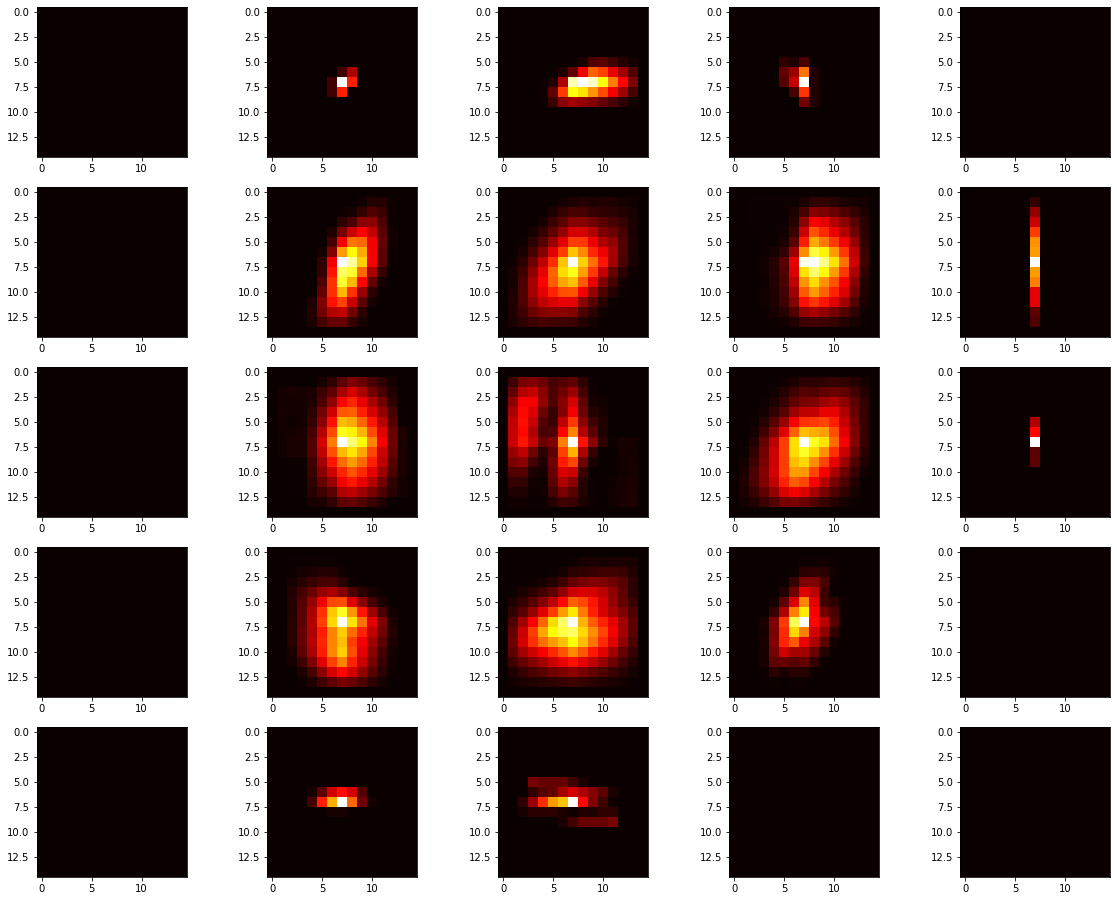

In [ ]:
fig=plt.figure(figsize=(20,16))
for i in range(5*5):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(hats.histograms[i, 0], cmap='hot')
plt.show()

#### Train/Test N-MNIST using HATS

In [ ]:
# Training
model_set = []

hats = HATS()
for sample in tqdm(range(15)):
    for digit in range(10):
        digit_names = list(dataset[f'{digit}'].keys())[sample:sample+1]
        activations = []
        for name in digit_names:
            print(f'Digit {digit}:{name}')
            data = dataset[f'{digit}'][f'{name}']
            events = [Event(*ev) for ev in data]
            events_np = np.array(events, dtype=event_dtype)
            
            hats.reset()
            hats.process_all(events_np)
            
            features = hats.histograms.flatten()
            
            model_set.append(TrainingSample(features=features, label=digit))

  0%|          | 0/15 [00:00<?, ?it/s]

Digit 0:digit_03263
Digit 1:digit_00024
Digit 2:digit_01448
Digit 3:digit_02633
Digit 4:digit_01474
Digit 5:digit_01312
Digit 6:digit_09766
Digit 7:digit_00030
Digit 8:digit_00018
Digit 9:digit_00742


  7%|▋         | 1/15 [01:22<19:15, 82.55s/it]

Digit 0:digit_05148
Digit 1:digit_02155
Digit 2:digit_02627
Digit 3:digit_05174
Digit 4:digit_03505
Digit 5:digit_04530
Digit 6:digit_10551
Digit 7:digit_03539
Digit 8:digit_10223
Digit 9:digit_00756


 13%|█▎        | 2/15 [03:00<19:48, 91.43s/it]

Digit 0:digit_06327
Digit 1:digit_09014
Digit 2:digit_04242
Digit 3:digit_05612
Digit 4:digit_06455
Digit 5:digit_09996
Digit 6:digit_11129
Digit 7:digit_04256
Digit 8:digit_11673
Digit 9:digit_02141


 20%|██        | 3/15 [04:26<17:49, 89.09s/it]

Digit 0:digit_06333
Digit 1:digit_11667
Digit 2:digit_07987
Digit 3:digit_06441
Digit 4:digit_08478
Digit 5:digit_10579
Digit 6:digit_12434
Digit 7:digit_07993
Digit 8:digit_12420
Digit 9:digit_04524


 27%|██▋       | 4/15 [05:52<16:05, 87.82s/it]

Digit 0:digit_07039
Digit 1:digit_15429
Digit 2:digit_11897
Digit 3:digit_07763
Digit 4:digit_10237
Digit 5:digit_11840
Digit 6:digit_14045
Digit 7:digit_10545
Digit 8:digit_15367
Digit 9:digit_09000


 33%|███▎      | 5/15 [07:16<14:26, 86.65s/it]

Digit 0:digit_12352
Digit 1:digit_16108
Digit 2:digit_14051
Digit 3:digit_12346
Digit 4:digit_13070
Digit 5:digit_11883
Digit 6:digit_19207
Digit 7:digit_16134
Digit 8:digit_18131
Digit 9:digit_09772


 40%|████      | 6/15 [08:40<12:50, 85.63s/it]

Digit 0:digit_14723
Digit 1:digit_16652
Digit 2:digit_20486
Digit 3:digit_14737
Digit 4:digit_15401
Digit 5:digit_14079
Digit 6:digit_23831
Digit 7:digit_17558
Digit 8:digit_18643
Digit 9:digit_13058


 47%|████▋     | 7/15 [10:06<11:26, 85.78s/it]

Digit 0:digit_16120
Digit 1:digit_28970
Digit 2:digit_22285
Digit 3:digit_16646
Digit 4:digit_17216
Digit 5:digit_17202
Digit 6:digit_24192
Digit 7:digit_19575
Digit 8:digit_20492
Digit 9:digit_18119


 53%|█████▎    | 8/15 [11:22<09:39, 82.74s/it]

Digit 0:digit_21954
Digit 1:digit_35909
Digit 2:digit_24804
Digit 3:digit_17570
Digit 4:digit_21798
Digit 5:digit_23825
Digit 6:digit_24838
Digit 7:digit_32096
Digit 8:digit_22291
Digit 9:digit_19213


 60%|██████    | 9/15 [12:51<08:26, 84.45s/it]

Digit 0:digit_26785
Digit 1:digit_37844
Digit 2:digit_26975
Digit 3:digit_21940
Digit 4:digit_26791
Digit 5:digit_30859
Digit 6:digit_25298
Digit 7:digit_35921
Digit 8:digit_26949
Digit 9:digit_19561


 67%|██████▋   | 10/15 [14:22<07:13, 86.72s/it]

Digit 0:digit_34395
Digit 1:digit_37850
Digit 2:digit_32082
Digit 3:digit_28958
Digit 4:digit_28964
Digit 5:digit_30865
Digit 6:digit_30681
Digit 7:digit_38587
Digit 8:digit_28780
Digit 9:digit_24186


 73%|███████▎  | 11/15 [15:42<05:37, 84.43s/it]

Digit 0:digit_35935
Digit 1:digit_40400
Digit 2:digit_40366
Digit 3:digit_36596
Digit 4:digit_37688
Digit 5:digit_32041
Digit 6:digit_32928
Digit 7:digit_39869
Digit 8:digit_30871
Digit 9:digit_30695


 80%|████████  | 12/15 [17:10<04:16, 85.50s/it]

Digit 0:digit_41078
Digit 1:digit_44114
Digit 2:digit_40414
Digit 3:digit_40428
Digit 4:digit_42217
Digit 5:digit_38593
Digit 6:digit_34381
Digit 7:digit_42203
Digit 8:digit_33388
Digit 9:digit_37878


 87%|████████▋ | 13/15 [18:54<03:02, 91.35s/it]

Digit 0:digit_44128
Digit 1:digit_46059
Digit 2:digit_41722
Digit 3:digit_44672
Digit 4:digit_46717
Digit 5:digit_41050
Digit 6:digit_36582
Digit 7:digit_43109
Digit 8:digit_47421
Digit 9:digit_40372


 93%|█████████▎| 14/15 [20:26<01:31, 91.42s/it]

Digit 0:digit_45236
Digit 1:digit_49356
Digit 2:digit_44882
Digit 3:digit_46071
Digit 4:digit_48048
Digit 5:digit_44100
Digit 6:digit_42559
Digit 7:digit_48074
Digit 8:digit_48712
Digit 9:digit_42565


100%|██████████| 15/15 [22:04<00:00, 88.30s/it]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

unzipped = list(zip(*model_set)) 
X = unzipped[0]
y = unzipped[1]

knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
# Testing
correct = 0
total = 0
y_true = []
y_pred = []
for digit in range(10):
    digit_names = list(dataset[f'{digit}'].keys())[15:20]
    for name in digit_names:
        print(f'digit{digit}, name{name}')
        data = dataset[f'{digit}'][f'{name}']
        events = [Event(*ev) for ev in data]
        
        events_np = np.array(events, dtype=event_dtype)
            
        hats.reset()
        hats.process_all(events_np)

        features = hats.histograms.flatten()
        
        pred = knn.predict(features.reshape(1, -1))
        y_pred.append(pred)
        y_true.append(digit)
        
        print(f'Predicted {pred}, Real {digit}')
        correct += int(digit == pred)
        total += 1

digit0, namedigit_45578
Predicted [0], Real 0
digit0, namedigit_49430
Predicted [0], Real 0
digit0, namedigit_54475
Predicted [0], Real 0
digit0, namedigit_56510
Predicted [0], Real 0
digit0, namedigit_58501
Predicted [0], Real 0
digit1, namedigit_53468
Predicted [1], Real 1
digit1, namedigit_56262
Predicted [1], Real 1
digit1, namedigit_57632
Predicted [1], Real 1
digit1, namedigit_58267
Predicted [1], Real 1
digit1, namedigit_59151
Predicted [1], Real 1
digit2, namedigit_45544
Predicted [2], Real 2
digit2, namedigit_47409
Predicted [1], Real 2
digit2, namedigit_54307
Predicted [8], Real 2
digit2, namedigit_54449
Predicted [2], Real 2
digit2, namedigit_57154
Predicted [2], Real 2
digit3, namedigit_46703
Predicted [3], Real 3
digit3, namedigit_53454
Predicted [3], Real 3
digit3, namedigit_54461
Predicted [3], Real 3
digit3, namedigit_56276
Predicted [3], Real 3
digit3, namedigit_59179
Predicted [3], Real 3
digit4, namedigit_49342
Predicted [4], Real 4
digit4, namedigit_49424
Predicted 

In [ ]:
def print_confusion_matrix(confusion_matrix, plot_title='Confusion Matrix'):
    
    np.set_printoptions(precision=2)
    
    classes = np.arange(0,10,1)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    im = ax.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(confusion_matrix.shape[1]), 
           yticks=np.arange(confusion_matrix.shape[0]),
           xticklabels=classes, 
           yticklabels=classes,
           title=plot_title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Loop over data dimensions and create text annotations.
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(j, i, confusion_matrix[i, j],
                    ha="center", va="center",
                    color="white" if confusion_matrix[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

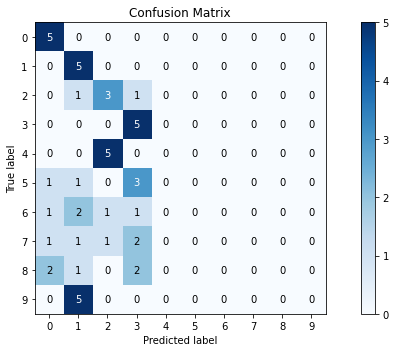

In [ ]:
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix

print_confusion_matrix(sklearn_confusion_matrix(y_true, y_pred))